In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('week3.csv')

In [3]:
df.dtypes

Date                       object
Unnamed: 0                  int64
Symbol                     object
Series                     object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
month                       int64
year                        int64
Day_Perc_Change           float64
Trend                      object
volume scaled             float64
sma_21                    float64
sma_34                    float64
MA                        float64
roll_CP_std               float64
UP_band                   float64
LO_band                   float64
buy                       float64
sell                      float64
MA_std        

In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
data=df.loc[13:,['Close Price','MA','UP_band','LO_band']]

In [6]:
data=data.set_index(np.arange(len(data)))

In [7]:
data

,Close Price,MA,UP_band,LO_band
0,912.25,989.057143,1090.120625,887.993660
1,930.85,982.300000,1085.509041,879.090959
2,936.05,974.114286,1072.013138,876.215433
3,952.55,967.221429,1055.509591,878.933267
4,955.20,962.639286,1045.781945,879.496626
...,...,...,...,...
476,1282.25,1333.992857,1387.302069,1280.683645
477,1262.45,1326.917857,1389.912468,1263.923247
478,1268.80,1319.660714,1384.460301,1254.861128
479,1264.50,1311.328571,1371.932033,1250.725110


In [8]:
l=[]
for i in range(len(data['Close Price'])):
    if(data['Close Price'][i]<data['LO_band'][i]):
        l.append('Buy')
    elif(data['Close Price'][i]>=data['LO_band'][i] and data['Close Price'][i]<data['MA'][i]):
        l.append('Hold Buy')
    elif(data['Close Price'][i]>=data['MA'][i] and data['Close Price'][i]<data['UP_band'][i]):
        l.append('Hold Short')
    else:
        l.append('Short')

In [9]:
data['Call']=pd.Series(l)    

In [10]:
data

,Close Price,MA,UP_band,LO_band,Call
0,912.25,989.057143,1090.120625,887.993660,Hold Buy
1,930.85,982.300000,1085.509041,879.090959,Hold Buy
2,936.05,974.114286,1072.013138,876.215433,Hold Buy
3,952.55,967.221429,1055.509591,878.933267,Hold Buy
4,955.20,962.639286,1045.781945,879.496626,Hold Buy
...,...,...,...,...,...
476,1282.25,1333.992857,1387.302069,1280.683645,Hold Buy
477,1262.45,1326.917857,1389.912468,1263.923247,Buy
478,1268.80,1319.660714,1384.460301,1254.861128,Hold Buy
479,1264.50,1311.328571,1371.932033,1250.725110,Hold Buy


In [11]:
X=data.loc[:,['Close Price','MA','LO_band','UP_band']]

y=data.iloc[:,-1]

In [12]:
from sklearn.preprocessing import LabelEncoder

lab=LabelEncoder()

y=lab.fit_transform(y)

In [13]:
label=lab.classes_
label

array(['Buy', 'Hold Buy', 'Hold Short', 'Short'], dtype=object)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)


from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=5000)

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=8)

from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()


from sklearn.svm import SVC
svm=SVC()

In [15]:
# Logistic Regression

In [16]:
log.fit(X_train,y_train)

log.score(X_train,y_train)


1.0

In [17]:
log.score(X_test,y_test)

0.9917355371900827

In [18]:
log.predict(X_test)

array([1, 1, 2, 3, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 3, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 1, 2, 2, 3, 2, 1, 1, 2, 1, 1, 0, 2,
       1, 1, 2, 1, 2, 3, 3, 2, 2, 3, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 3,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2])

In [19]:
# Decision tree

In [20]:
dt.fit(X_train,y_train)

dt.score(X_train,y_train)

0.9583333333333334

In [21]:
dt.score(X_test,y_test)

0.7520661157024794

In [22]:
# RandomForest 

In [23]:
rand.fit(X_train,y_train)

rand.score(X_train,y_train)

1.0

In [24]:
rand.score(X_test,y_test)

0.8347107438016529

In [25]:
# Support Vector Machine

In [26]:
svm.fit(X_train,y_train)

svm.score(X_test,y_test)


0.7355371900826446

In [27]:
# importing Gail dataset and predicting the daily calls 

In [28]:
gail=pd.read_csv('GAIL.csv')

ma=gail['Close Price'].rolling(14).mean()
std=gail['Close Price'].rolling(14).std()
lo=ma-2*std
up=ma+2*std


In [29]:
data1=pd.DataFrame({'Stock_Price':gail['Close Price'],
              'MA':ma,'LO_band':lo,'UP_band':up})

In [30]:
data1

,Stock_Price,MA,LO_band,UP_band
0,414.00,NaN,NaN,NaN
1,411.40,NaN,NaN,NaN
2,408.30,NaN,NaN,NaN
3,404.75,NaN,NaN,NaN
4,401.05,NaN,NaN,NaN
...,...,...,...,...
489,340.75,348.367857,337.199729,359.535985
490,337.50,346.992857,335.533977,358.451737
491,340.40,346.017857,334.825854,357.209860
492,341.55,345.300000,334.364033,356.235967


In [31]:
data1=data1.dropna()

In [32]:
data1

,Stock_Price,MA,LO_band,UP_band
13,410.35,402.457143,382.910085,422.004201
14,402.35,401.625000,383.237180,420.012820
15,398.00,400.667857,383.094906,418.240809
16,398.90,399.996429,382.969822,417.023035
17,402.60,399.842857,382.962789,416.722925
...,...,...,...,...
489,340.75,348.367857,337.199729,359.535985
490,337.50,346.992857,335.533977,358.451737
491,340.40,346.017857,334.825854,357.209860
492,341.55,345.300000,334.364033,356.235967


In [33]:
label_pred=log.predict(data1)

In [34]:
calls=[]

for e in label_pred:
    if(e==0):
        calls.append('Buy')
    elif(e==1):
        calls.append('Hold Buy')
    elif(e==2):
        calls.append('Hold Short')
    else:
        calls.append('Short')

In [40]:
data1=data1.assign(Calls=calls)

In [41]:
data1

,Stock_Price,MA,LO_band,UP_band,Calls
13,410.35,402.457143,382.910085,422.004201,Hold Short
14,402.35,401.625000,383.237180,420.012820,Hold Short
15,398.00,400.667857,383.094906,418.240809,Hold Buy
16,398.90,399.996429,382.969822,417.023035,Hold Buy
17,402.60,399.842857,382.962789,416.722925,Hold Short
...,...,...,...,...,...
489,340.75,348.367857,337.199729,359.535985,Hold Buy
490,337.50,346.992857,335.533977,358.451737,Hold Buy
491,340.40,346.017857,334.825854,357.209860,Hold Buy
492,341.55,345.300000,334.364033,356.235967,Hold Buy


In [42]:
data1['Calls'].value_counts()

Hold Short    258
Hold Buy      190
Buy            20
Short          13
Name: Calls, dtype: int64

In [43]:
# importing the dataset

In [44]:
tcs=pd.read_csv('TCS.csv')

In [45]:
tcs.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [46]:
tcs['%OC']=tcs.loc[:,['Open Price','Close Price']].diff(axis=1)['Close Price']/tcs['Open Price']*100
tcs['%LH']=tcs.loc[:,['Low Price','High Price']].diff(axis=1)['High Price']/tcs['Low Price']*100

tcs['roll_mean']=tcs['Close Price'].pct_change().rolling(5).mean()*100
tcs['roll_std']=tcs['Close Price'].pct_change().rolling(5).std()*100


In [47]:
l2=[]
for i in range(len(tcs['Close Price'])):
    if(tcs['Close Price'][i+1]>tcs['Close Price'][i]):
        l2.append(1)
    elif(tcs['Close Price'][i+1]<tcs['Close Price'][i]):
        l2.append(-1)    
    else:
        break

In [48]:
tcs['Action']=pd.Series(l2)


In [49]:
tcs=tcs.dropna()

In [50]:
X=tcs.loc[:,['%OC','%LH','roll_mean','roll_std']].values
y=tcs.iloc[:,-1]


In [51]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)



In [52]:
rand.fit(X_train,y_train)

rand.score(X_train,y_train)

1.0

In [53]:
rand.score(X_test,y_test)


0.4766355140186916

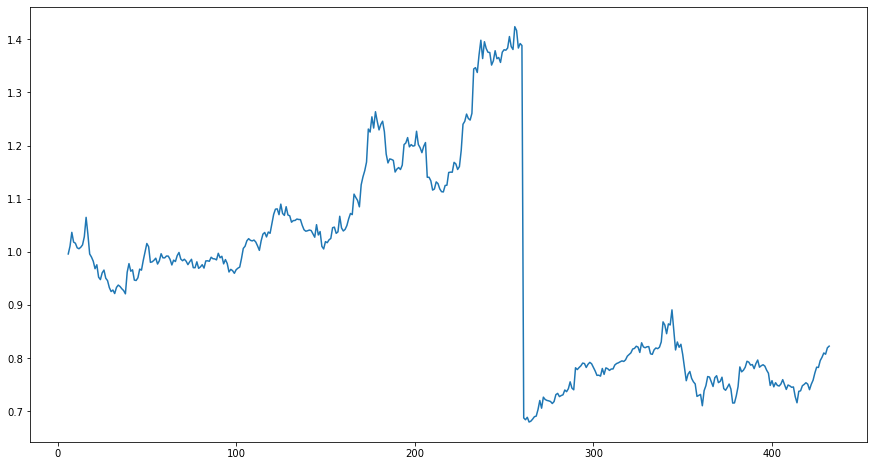

In [54]:
# plot of cumulative return 
plt.figure(figsize=(15,8))
tcs['cum_return']=(tcs['Close Price'].pct_change()+1).cumprod()
plt.plot(tcs['cum_return'])
